# Proyecto Data_Analytics-Henry-Data010

# Analisis exploratorios de los datos (EDA) - Mauro Ferrera

In [2]:
#### IMPORTAMOS LIBRERIAS IMPORTAMOS LOS DATOS
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas_profiling

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonoteboo

In [3]:
#### IMPORTAMOS LOS DATOS
data1 = pd.read_csv('AccidentesAviones.csv')
print(data1.shape)
data1.head(5)

(5008, 18)


,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [4]:
#### DESCRIPCION ESTADISTICA DE LOS DATOS
data1.describe()

,Unnamed: 0
count,5008.000000
mean,2503.500000
std,1445.829404
min,0.000000
25%,1251.750000
50%,2503.500000
75%,3755.250000
max,5007.000000


In [5]:
#### CONTEO DE NULOS 
data1.isnull().sum()

Unnamed: 0                0
fecha                     0
HORA declarada            0
Ruta                      0
OperadOR                  0
flight_no                 0
route                     0
ac_type                   0
registration              0
cn_ln                     0
all_aboard                0
PASAJEROS A BORDO         0
crew_aboard               0
cantidad de fallecidos    0
passenger_fatalities      0
crew_fatalities           0
ground                    0
summary                   0
dtype: int64

In [6]:
#### INFORMACION GENERAL DE LOS DATOS 
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5008 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

### Remplazamos '?' por nulos nan y hacemos un conteo de nulos

In [7]:
data1 = data1.replace('?',np.nan)
data1.isnull().sum()

Unnamed: 0                   0
fecha                        0
HORA declarada            1504
Ruta                         5
OperadOR                    10
flight_no                 3682
route                      762
ac_type                     13
registration               272
cn_ln                      667
all_aboard                  17
PASAJEROS A BORDO          221
crew_aboard                219
cantidad de fallecidos       8
passenger_fatalities       235
crew_fatalities            235
ground                      44
summary                     59
dtype: int64

### Eliminamos columnas innecesarias 

In [8]:
data1 = data1.drop(['HORA declarada'], axis=1)
data1 = data1.drop(['flight_no'     ], axis=1)
data1 = data1.drop(['cn_ln'         ], axis=1)
data1 = data1.drop(['route'         ], axis=1)

In [9]:
#### REMPLAZAMOS NULOS PARA PODER CAMBIAR EL TIPO DE DATO DE LA COLUMNA
data1 = data1.replace(np.nan,'999')
data1['registration'] = data1['registration'].replace('999',np.nan)
data1['Ruta'] = data1['Ruta'].replace('999',np.nan)
data1['OperadOR'] = data1['OperadOR'].replace('999',np.nan)
data1['ac_type'] = data1['ac_type'].replace('999',np.nan)
data1['summary'] = data1['summary'].replace('999',np.nan)

### Procedemos a ponerle el tipo de dato correcto a cada columna

In [10]:
data1['all_aboard']             = data1['all_aboard']            .astype(int)
data1['PASAJEROS A BORDO']      = data1['PASAJEROS A BORDO']     .astype(int)
data1['crew_aboard']            = data1['crew_aboard']           .astype(int)
data1['cantidad de fallecidos'] = data1['cantidad de fallecidos'].astype(int)
data1['passenger_fatalities']   = data1['passenger_fatalities']  .astype(int)
data1['crew_fatalities']        = data1['crew_fatalities']       .astype(int)
data1['ground']                 = data1['ground']                .astype(int)
data1['fecha']                  = pd.to_datetime(data1['fecha'])


In [11]:
#### REMPLAZAMOS LOS DATOS 'NULOS' POR EL PROMEDIO DE CADA COLUMNA
data1['PASAJEROS A BORDO'] = data1['PASAJEROS A BORDO'].replace(999, 27) 
data1['all_aboard'] = data1['all_aboard'].replace(999,31)
data1['crew_aboard'] = data1['crew_aboard'].replace(999,4)
data1['cantidad de fallecidos'] = data1['cantidad de fallecidos'].replace(999,22)
data1['passenger_fatalities'] = data1['passenger_fatalities'].replace(999,18)
data1['crew_fatalities'] = data1['crew_fatalities'].replace(999,3)
data1['ground'] = data1['ground'].replace(999,2)

In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0              5008 non-null   int64         
 1   fecha                   5008 non-null   datetime64[ns]
 2   Ruta                    5003 non-null   object        
 3   OperadOR                4998 non-null   object        
 4   ac_type                 4995 non-null   object        
 5   registration            4736 non-null   object        
 6   all_aboard              5008 non-null   int32         
 7   PASAJEROS A BORDO       5008 non-null   int32         
 8   crew_aboard             5008 non-null   int32         
 9   cantidad de fallecidos  5008 non-null   int32         
 10  passenger_fatalities    5008 non-null   int32         
 11  crew_fatalities         5008 non-null   int32         
 12  ground                  5008 non-null   int32   

### Correlacion de los datos con mapa de calor

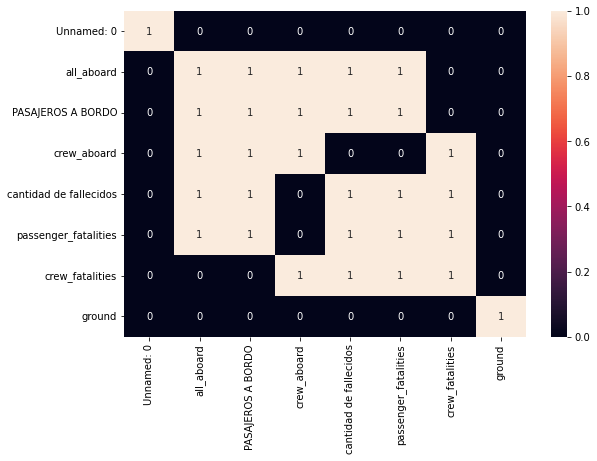

In [13]:
datos_corr = data1.corr().round()
plt.figure(figsize=(9,6))
sns.heatmap(data=datos_corr,annot=True)
plt.show()

### Encontrar outliers o valores atipicos 

In [14]:
## Buscamos solo en las columnas numericas 
dataoutlier = data1[['all_aboard','crew_aboard','cantidad de fallecidos','passenger_fatalities','crew_fatalities','ground']]
Q1= dataoutlier.quantile(0.25)
Q3= dataoutlier.quantile(0.75)
IQR = Q3 -Q1

limite_inf = Q1  - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR
mascaras = (dataoutlier < limite_inf) | (dataoutlier > limite_sup)
valores_atipicos = dataoutlier[mascaras]
valores_atipicos

,all_aboard,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
5003,NaN,NaN,NaN,NaN,NaN,NaN
5004,NaN,NaN,NaN,NaN,NaN,NaN
5005,NaN,NaN,NaN,NaN,NaN,NaN
5006,96.0,NaN,NaN,NaN,NaN,3.0


### Creamos la columna 'años' en base a la columna 'fecha'

In [15]:
data1['release_year'] = data1['fecha'].dt.year

In [16]:
data1['release_year'].head(3)

0    1908
1    1909
2    1912
Name: release_year, dtype: int64

### Creamos un grafico de dispersion 

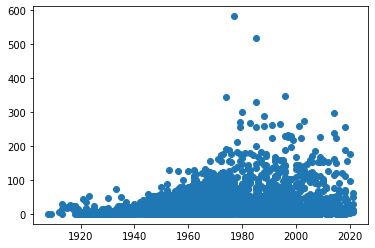

In [17]:
x=data1['release_year']
y=data1['cantidad de fallecidos']
plt.scatter(x,y)
plt.show()

In [18]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0              5008 non-null   int64         
 1   fecha                   5008 non-null   datetime64[ns]
 2   Ruta                    5003 non-null   object        
 3   OperadOR                4998 non-null   object        
 4   ac_type                 4995 non-null   object        
 5   registration            4736 non-null   object        
 6   all_aboard              5008 non-null   int32         
 7   PASAJEROS A BORDO       5008 non-null   int32         
 8   crew_aboard             5008 non-null   int32         
 9   cantidad de fallecidos  5008 non-null   int32         
 10  passenger_fatalities    5008 non-null   int32         
 11  crew_fatalities         5008 non-null   int32         
 12  ground                  5008 non-null   int32   

### Normalizamos los nombres de las columnas

In [19]:
Columns_new = {'registration':'Registros', 'all_aboard':'Todos_abordo', 'PASAJEROS A BORDO':'Pasajeros_a_bordo', 'crew_aboard':'Tripulacion_abordo', 'passenger_fatalities':'Pasajeros_fallecidos', 'crew_fatalities':'Tripulacionfallecida', 'ground':'suelo', 'summary':'Resumen', 'release_year':'Año_realializado', 'EventDate':'Fecha_evento'}
data1 = data1.rename(columns= Columns_new) 

In [20]:
data1.head(10)

,Unnamed: 0,fecha,Ruta,OperadOR,ac_type,Registros,Todos_abordo,Pasajeros_a_bordo,Tripulacion_abordo,cantidad de fallecidos,Pasajeros_fallecidos,Tripulacionfallecida,suelo,Resumen,Año_realializado
0,0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,NaN,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",1908
1,1,1909-09-07,"Juvisy-sur-Orge, France",NaN,Wright Byplane,SC1,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,1909
2,2,1912-07-12,"Atlantic City, New Jersey",Military - U.S. Navy,Dirigible,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...,1912
3,3,1913-08-06,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...,1913
4,4,1913-09-09,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),NaN,20,27,4,14,18,3,0,The airship flew into a thunderstorm and encou...,1913
5,5,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),NaN,28,27,4,28,18,3,0,Hydrogen gas which was being vented was sucked...,1913
6,6,1915-03-05,"Tienen, Belgium",Military - German Navy,Zeppelin L-8 (airship),NaN,41,0,41,17,0,17,0,Crashed into trees while attempting to land af...,1915
7,7,1915-09-03,"Off Cuxhaven, Germany",Military - German Navy,Zeppelin L-10 (airship),NaN,19,27,4,19,18,3,0,"Exploded and burned near Neuwerk Island, when...",1915
8,8,1916-07-28,"Near Jambol, Bulgeria",Military - German Army,Schutte-Lanz S-L-10 (airship),NaN,20,27,4,20,18,3,0,"Crashed near the Black Sea, cause unknown.",1916
9,9,1916-09-24,"Billericay, England",Military - German Navy,Zeppelin L-32 (airship),NaN,22,27,4,22,18,3,0,Shot down by British aircraft crashing in flames.,1916


In [21]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0              5008 non-null   int64         
 1   fecha                   5008 non-null   datetime64[ns]
 2   Ruta                    5003 non-null   object        
 3   OperadOR                4998 non-null   object        
 4   ac_type                 4995 non-null   object        
 5   Registros               4736 non-null   object        
 6   Todos_abordo            5008 non-null   int32         
 7   Pasajeros_a_bordo       5008 non-null   int32         
 8   Tripulacion_abordo      5008 non-null   int32         
 9   cantidad de fallecidos  5008 non-null   int32         
 10  Pasajeros_fallecidos    5008 non-null   int32         
 11  Tripulacionfallecida    5008 non-null   int32         
 12  suelo                   5008 non-null   int32   

## Segundo datasets

In [22]:
data2 = pd.read_csv('cases2023-05-18_15-28.csv')
print(data2.shape)
data2.head(3)

(126, 20)


,NtsbNo,EventType,Mkey,EventDate,City,State,Country,ReportNo,N#,HasSafetyRec,Mode,ReportType,OriginalPublishedDate,HighestInjuryLevel,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,ProbableCause,Findings,DocketUrl
0,LAX93LA109,ACC,27917,1993-01-31T22:30:00Z,COLUMBIA,California,United States,NaN,N16SC,False,Aviation,DirectorBrief,1993-11-15T05:00:00Z,None,0,0,0,THE PILOT'S FAILURE TO MAINTAIN A PROPER GLIDE...,NaN,https://data.ntsb.gov/Docket?ProjectID=27917
1,CHI93LA082,ACC,15659,1993-01-31T19:00:00Z,WARREN,Minnesota,United States,NaN,N3571V,False,Aviation,DirectorBrief,1993-10-25T04:00:00Z,None,0,0,0,THE PILOT'S INADEQUATE COMPENSATION FOR VARIAB...,NaN,https://data.ntsb.gov/Docket?ProjectID=15659
2,BFO93LA024,ACC,11897,1993-01-31T12:58:00Z,LANHAM,Maryland,United States,NaN,N1383R,False,Aviation,DirectorBrief,1993-10-13T04:00:00Z,Serious,0,1,0,THE BLOCKAGE OF THE RIGHT AND LEFT FUEL VENT L...,NaN,https://data.ntsb.gov/Docket?ProjectID=11897


In [23]:
### ELIMINAMOS COLUMNAS QUE NO SON RELEVANTES PARA NOSOTROS
data2 = data2.drop(['ReportNo'],axis=1)
data2 = data2.drop(['DocketUrl'],axis=1)
data2 = data2.drop(['NtsbNo'],axis=1)

In [24]:
### PASAMOS COLUMNAS FECHAS A TIPO FECHA
data2['EventDate'] = pd.to_datetime(data2['EventDate'])
data2['OriginalPublishedDate'] = pd.to_datetime(data2['OriginalPublishedDate'])

In [25]:
### NORMALIZAMOS LOS NOMBRES DE LAS COLUMNAS 
Nombres_normalizados = {'EventType':'Tipo_evento', 'EventDate':'Fecha_evento', 'City':'Ciudad', 'State':'Estado', 'Country':'Pais', 'HasSafetyRec':'Grabaion_seguridad', 'Mode':'Modo', 'ReportType':'Tipo_reporte', 'OriginalPublishedDate':'FrchaPublicacionOriginal', 'HighestInjuryLevel':'Nivel_lesiones', 'FatalInjuryCount':'Lesiones_fatales', 'SeriousInjuryCount':'Lesiones_graves', 'MinorInjuryCount':'Lesiones_menores', 'ProbableCause':'Cuasa_probable', 'Findings':'Recomendacion'}
data2 = data2.rename(columns=Nombres_normalizados)

In [26]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Tipo_evento               126 non-null    object             
 1   Mkey                      126 non-null    int64              
 2   Fecha_evento              126 non-null    datetime64[ns, UTC]
 3   Ciudad                    126 non-null    object             
 4   Estado                    123 non-null    object             
 5   Pais                      126 non-null    object             
 6   N#                        126 non-null    object             
 7   Grabaion_seguridad        126 non-null    bool               
 8   Modo                      126 non-null    object             
 9   Tipo_reporte              126 non-null    object             
 10  FrchaPublicacionOriginal  123 non-null    datetime64[ns, UTC]
 11  Nivel_lesiones     

In [27]:
data2.isnull().sum()

Tipo_evento                   0
Mkey                          0
Fecha_evento                  0
Ciudad                        0
Estado                        3
Pais                          0
N#                            0
Grabaion_seguridad            0
Modo                          0
Tipo_reporte                  0
FrchaPublicacionOriginal      3
Nivel_lesiones                0
Lesiones_fatales              0
Lesiones_graves               0
Lesiones_menores              0
Cuasa_probable                3
Recomendacion               126
dtype: int64

In [28]:
data2.describe()

,Mkey,Lesiones_fatales,Lesiones_graves,Lesiones_menores,Recomendacion
count,126.000000,126.000000,126.000000,126.000000,0.0
mean,23413.261905,0.333333,0.190476,0.460317,NaN
std,10928.258550,0.829458,0.665904,1.970384,NaN
min,2327.000000,0.000000,0.000000,0.000000,NaN
25%,15647.250000,0.000000,0.000000,0.000000,NaN
50%,18688.500000,0.000000,0.000000,0.000000,NaN
75%,33211.750000,0.000000,0.000000,0.000000,NaN
max,42988.000000,4.000000,4.000000,21.000000,NaN


### Creamo un mapa de calor

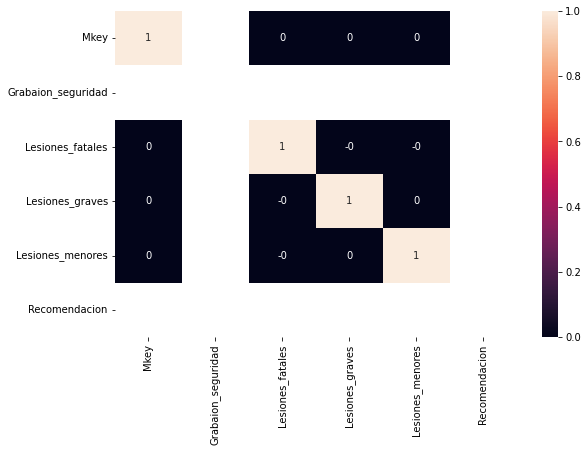

In [29]:
datos_corr = data2.corr().round()
plt.figure(figsize=(9,6))
sns.heatmap(data=datos_corr,annot=True)
plt.show()

### Exportamos los csv

In [30]:
data1.to_csv('data_aereo.csv', index=False)
data2.to_csv('data_aereo1.csv', index=False)

### Creamos unos reportes de los datos con pandas_profiling

In [31]:
report = data1.profile_report(title='Datos sobre accidentes aereos 1')
report.to_file(output_file='report.html')
report1 = data2.profile_report(title='Datos sobre accidentes aereos 2')
report1.to_file(output_file='report1.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 20.83it/s]


### Importamos un 3er datasets

In [32]:
data3 = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv')
print(data3.shape)
data3.head(10)

(4967, 17)


,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...
5,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,NaN,NaN,30.0,NaN,NaN,0.0,Hydrogen gas which was being vented was sucked...
6,03/05/1915,01:00,"Tienen, Belgium",Military - German Navy,NaN,NaN,Zeppelin L-8 (airship),NaN,NaN,41.0,NaN,NaN,21.0,NaN,NaN,0.0,Crashed into trees while attempting to land af...
7,09/03/1915,15:20,"Off Cuxhaven, Germany",Military - German Navy,NaN,NaN,Zeppelin L-10 (airship),NaN,NaN,19.0,NaN,NaN,19.0,NaN,NaN,0.0,"Exploded and burned near Neuwerk Island, when..."
8,07/28/1916,NaN,"Near Jambol, Bulgeria",Military - German Army,NaN,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20.0,NaN,NaN,20.0,NaN,NaN,0.0,"Crashed near the Black Sea, cause unknown."
9,09/24/1916,01:00,"Billericay, England",Military - German Navy,NaN,NaN,Zeppelin L-32 (airship),NaN,NaN,22.0,NaN,NaN,22.0,NaN,NaN,0.0,Shot down by British aircraft crashing in flames.


In [33]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4967 non-null   object 
 1   Time                   3457 non-null   object 
 2   Location               4963 non-null   object 
 3   Operator               4957 non-null   object 
 4   Flight #               1315 non-null   object 
 5   Route                  4193 non-null   object 
 6   AC Type                4952 non-null   object 
 7   Registration           4694 non-null   object 
 8   cn/ln                  4299 non-null   object 
 9   Aboard                 4949 non-null   float64
 10  Aboard Passangers      4738 non-null   float64
 11  Aboard Crew            4741 non-null   float64
 12  Fatalities             4959 non-null   float64
 13  Fatalities Passangers  4725 non-null   float64
 14  Fatalities Crew        4726 non-null   float64
 15  Grou

In [34]:
data3.isnull().sum()

Date                        0
Time                     1510
Location                    4
Operator                   10
Flight #                 3652
Route                     774
AC Type                    15
Registration              273
cn/ln                     668
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     41
Summary                    64
dtype: int64

In [35]:
data3.head(2)

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...


In [36]:
### ELIMINAMOS COLUMNAS INSERVIBLES
data3 = data3.drop(['Flight #'],axis= 1)
data3 = data3.drop(['Time'],axis= 1)

In [37]:
### NORMALIZAMOS LOS NOMBRES DE LAS COLUMNAS
renombrar = {'Date':'Fecha', 'Location':'Localidad', 'Operator':'Operador', 'Route':'Ruta', 'Registration':'Registros', 'Aboard':'Abordo', 'Aboard Passangers':'Pasajeros_abordo', 'Aboard Crew':'Tripulacion_abordo', 'Fatalities':'Muertes', 'Fatalities Passangers':'Pasajeros_muertos', 'Fatalities Crew':'Tiupulacion_muerta', 'Ground':'Suelo', 'Summary':'Resumen'}
data3 = data3.rename(columns=renombrar)

In [38]:
### CREAMOS UN REPORTE DE data3 CON pandas_profiling
report3 = data3.profile_report(title='Datos sobre accidentes aereos 3')
report3.to_file(output_file='report2.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 24.52it/s]


### Mapa de calor para data3

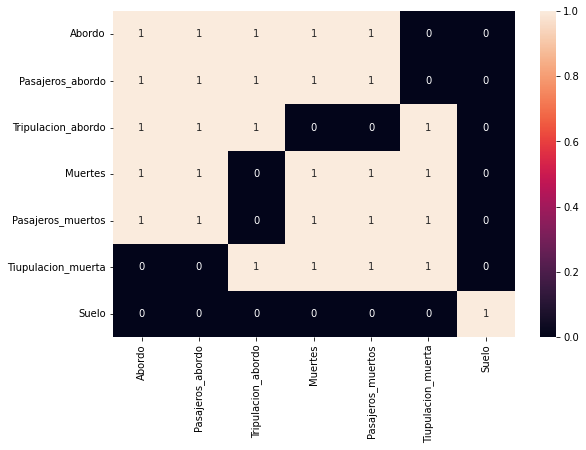

In [39]:
datos_corr = data3.corr().round()
plt.figure(figsize=(9,6))
sns.heatmap(data=datos_corr,annot=True)
plt.show()

In [47]:
data1 = data1.sort_values("Año_realializado")
data1["Tasa_Reducción_Accidentes"] = (data1["Unnamed: 0"] - data1["Unnamed: 0"].shift(1)) / data1["Unnamed: 0"].shift(1) * 100


In [46]:
data1["Tasa_Reducción_Muertes"] = (data1["cantidad de fallecidos"] - data1["cantidad de fallecidos"].shift(1)) / data1["cantidad de fallecidos"].shift(1) * 100
data1.head(10)

,Unnamed: 0,fecha,Ruta,OperadOR,ac_type,Registros,Todos_abordo,Pasajeros_a_bordo,Tripulacion_abordo,cantidad de fallecidos,Pasajeros_fallecidos,Tripulacionfallecida,suelo,Resumen,Año_realializado,Tasa_Reducción_Accidentes,Tasa_Reducción_Muertes
0,0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,NaN,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",1908,NaN,NaN
1,1,1909-09-07,"Juvisy-sur-Orge, France",NaN,Wright Byplane,SC1,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,1909,inf,0.000000
2,2,1912-07-12,"Atlantic City, New Jersey",Military - U.S. Navy,Dirigible,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...,1912,100.000000,400.000000
3,3,1913-08-06,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...,1913,50.000000,-80.000000
4,4,1913-09-09,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),NaN,20,27,4,14,18,3,0,The airship flew into a thunderstorm and encou...,1913,33.333333,1300.000000
5,5,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),NaN,28,27,4,28,18,3,0,Hydrogen gas which was being vented was sucked...,1913,25.000000,100.000000
6,6,1915-03-05,"Tienen, Belgium",Military - German Navy,Zeppelin L-8 (airship),NaN,41,0,41,17,0,17,0,Crashed into trees while attempting to land af...,1915,20.000000,-39.285714
7,7,1915-09-03,"Off Cuxhaven, Germany",Military - German Navy,Zeppelin L-10 (airship),NaN,19,27,4,19,18,3,0,"Exploded and burned near Neuwerk Island, when...",1915,16.666667,11.764706
8,8,1916-07-28,"Near Jambol, Bulgeria",Military - German Army,Schutte-Lanz S-L-10 (airship),NaN,20,27,4,20,18,3,0,"Crashed near the Black Sea, cause unknown.",1916,14.285714,5.263158
9,9,1916-09-24,"Billericay, England",Military - German Navy,Zeppelin L-32 (airship),NaN,22,27,4,22,18,3,0,Shot down by British aircraft crashing in flames.,1916,12.500000,10.000000


In [50]:
data1["Tendencia_Accidentes"] = data1["Tasa_Reducción_Accidentes"].apply(lambda x: "Aumento" if x > 0 else "Bajo")
data1["Tendencia_Muertes"] = data1["Tasa_Reducción_Muertes"].apply(lambda x: "Aumento" if x > 0 else "Bajo")

In [54]:
data1.head(3)

,Unnamed: 0,fecha,Ruta,OperadOR,ac_type,Registros,Todos_abordo,Pasajeros_a_bordo,Tripulacion_abordo,cantidad de fallecidos,Pasajeros_fallecidos,Tripulacionfallecida,suelo,Resumen,Año_realializado,Tasa_Reducción_Accidentes,Tasa_Reducción_Muertes,Tendencia_Accidentes,Tendencia_Muertes
0,0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,NaN,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",1908,NaN,NaN,Bajo,Bajo
1,1,1909-09-07,"Juvisy-sur-Orge, France",NaN,Wright Byplane,SC1,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,1909,inf,0.0,Aumento,Bajo
2,2,1912-07-12,"Atlantic City, New Jersey",Military - U.S. Navy,Dirigible,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...,1912,100.0,400.0,Aumento,Aumento


In [53]:
data1.to_csv('data_aereoLISTO.csv', index=False)
data2.to_csv('data_aereoLISTO1.csv', index=False)